In [2]:
%matplotlib inline

In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.constants as const
c = const.c.cgs.value

In [115]:
# BHR71
# corrected = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/bhr71_spire_corrected.fits'
corrected = '/Users/yaolun/bhr71/bhr71_SECT/spire_bhr71_corrected_32asGRB.fits'
extended = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_extended_apod.fits'
point = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
corrected_16as = '/Users/yaolun/bhr71/bhr71_SECT/bhr71_16as_beam.fits'

# L1157
# corrected = '/Users/yaolun/test/L1157/l1157_spire_corrected.fits'
# extended = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_extended_apod.fits'
# point = '/Users/yaolun/test/L1157/1342247625_HR_spectrum_point_apod.fits'

hdu_corrected = fits.open(corrected) # SLWC3:  2; SSWD4:  3 for BHR71; for others, SLWC3: 5, SSWD4: 18 
hdu_extended = fits.open(extended)   # SLWC3: 11; SSWD4: 39
hdu_point = fits.open(point)         # SLWC3:  5; SSWD4: 18
hdu_16as = fits.open(corrected_16as)

pix_slw = np.pi/4.*34**2
pix_ssw = np.pi/4.*19**2

# get the spectra from FITS file
# BHR71
wl_slw_cor = c/1e5/hdu_corrected[2].data.field(0)[3:-3]
flux_slw_cor = hdu_corrected[2].data.field(1)[3:-3]
wl_ssw_cor = c/1e5/hdu_corrected[3].data.field(0)[3:-3]
flux_ssw_cor = hdu_corrected[3].data.field(1)[3:-3]
# other
# wl_slw_cor = c/1e5/hdu_corrected[5].data.field(0)[3:-3]
# flux_slw_cor = hdu_corrected[5].data.field(1)[3:-3]
# wl_ssw_cor = c/1e5/hdu_corrected[18].data.field(0)[3:-3]
# flux_ssw_cor = hdu_corrected[18].data.field(1)[3:-3]

wl_slw_16as = c/1e5/hdu_16as[2].data.field(0)[3:-3]
flux_slw_16as = hdu_16as[2].data.field(1)[3:-3]
wl_ssw_16as = c/1e5/hdu_16as[3].data.field(0)[3:-3]
flux_ssw_16as = hdu_16as[3].data.field(1)[3:-3]

wl_slw_ext = c/1e5/hdu_extended[11].data.field(0)
flux_slw_ext = hdu_extended[11].data.field(1)*pix_slw*(np.pi/180./3600.)**2*1e26
wl_ssw_ext = c/1e5/hdu_extended[39].data.field(0)
flux_ssw_ext = hdu_extended[39].data.field(1)*pix_ssw*(np.pi/180./3600.)**2*1e26

wl_slw_pot = c/1e5/hdu_point[5].data.field(0)
flux_slw_pot = hdu_point[5].data.field(1)
wl_ssw_pot = c/1e5/hdu_point[18].data.field(0)
flux_ssw_pot = hdu_point[18].data.field(1)

In [117]:
# read PACS spectrum
wl_pacs, flux_pacs = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',\
                                   skip_header=1).T

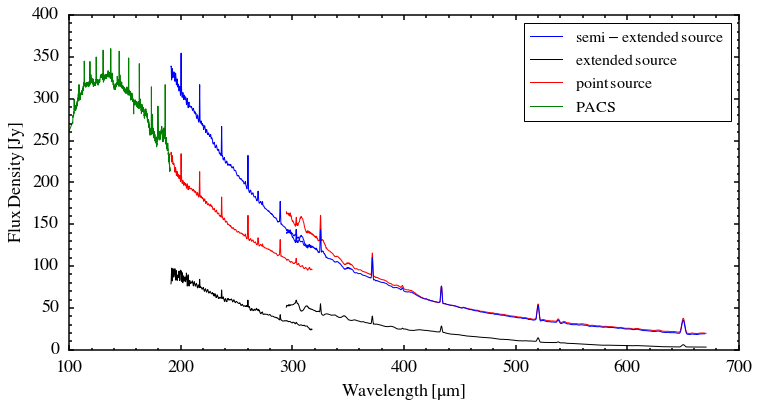

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ext, = ax.plot(wl_slw_ext, flux_slw_ext, 'k-', linewidth=1)
ax.plot(wl_ssw_ext, flux_ssw_ext, 'k-', linewidth=1)
pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', linewidth=1)
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-', linewidth=1)
cor, = ax.plot(wl_slw_cor, flux_slw_cor, 'b-', linewidth=1)
ax.plot(wl_ssw_cor, flux_ssw_cor, 'b-', linewidth=1)
# cor_16as, = ax.plot(wl_slw_16as, flux_slw_16as, '-', color='Magenta', linewidth=1)
# ax.plot(wl_ssw_16as, flux_ssw_16as, '-', color='Magenta', linewidth=1)

# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', linewidth=1)

# ax.legend([cor, ext, pot, pacs, cor_16as], \
#           [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$', r'$\rm{corrected\,with\,16\,arcsec}$'],\
#           numpoints=1, loc='best', fontsize=16)

ax.legend([cor, ext, pot, pacs], \
          [r'$\rm{semi-extended\,source}$', r'$\rm{extended\,source}$', r'$\rm{point\,source}$', r'$\rm{PACS}$'],\
          numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/spire_correction_com.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Experiment about SPIRE point source corrected datacube

In [7]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

In [19]:
cen_ra = hdu[18].header['RA']
cen_dec = hdu[18].header['DEC']
for i in [13,14,17,18,21,22]:
#     print hdu[i].header['RA'], hdu[i].header['DEC']
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    print ra_dum, dec_dum, (ra_dum**2+dec_dum**2)**0.5

0.161206361601 31.4197489688 31.4201625195
28.4528243553 17.294480426 33.29658041
-29.0112442248 14.5086509142 32.4369117337
0.0 0.0 0.0
-29.7053814341 -17.296185912 34.37393974
-1.65647590106 -32.6186219994 32.6606554366


In [113]:
# SLW
wl_slw_sum = c/1e5/hdu[2].data.field(0)
flux_slw_sum = np.zeros_like(hdu[2].data.field(1))
for i in range(2,9):
    flux_slw_sum += hdu[i].data.field(1)
    
# SSW
wl_ssw_sum = c/1e5/hdu[13].data.field(0)
flux_ssw_sum = np.zeros_like(hdu[13].data.field(1))
for i in [13,14,17,18,21,22]:
    flux_ssw_sum += hdu[i].data.field(1)

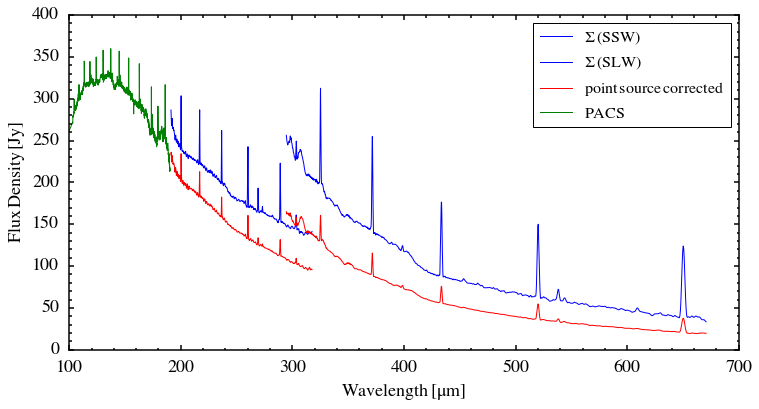

In [11]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-')
# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)


## Weight the SPIRE spaxel based on a reference Gaussian beam with an equivalent aperture of PACS 3x3 aperture

### Get the x, y offset of each spaxel w.r.t. the center

In [111]:
filename = '/Users/yaolun/bhr71/fitting/BHR71/spire/data/fits/1342248249_HR_spectrum_point_apod.fits'
hdu = fits.open(filename)

# Create a 2-D cartian grid for mapping 2-D Gaussian
def gauss2d(x, y, sigmax=13.5, sigmay=13.5):
    return 1/(2*np.pi*sigmax*sigmay) * np.exp( -(x**2/2./sigmax**2 + y**2/2./sigmay**2) )

r0 = 18.

cen_ra = hdu[18].header['RA']
cen_dec = hdu[18].header['DEC']
wl_ssw_wsum = c/1e5/hdu[13].data.field(0)
flux_ssw_wsum = np.zeros_like(hdu[13].data.field(1))
for i in [13,14,17,18,21,22]:
# for i in [13]:
    ra_dum = (hdu[i].header['RA']-cen_ra)*np.cos(np.radians(cen_dec))*3600.
    dec_dum = (hdu[i].header['DEC']-cen_dec) * 3600.
    # map a 70" x 70" grid
    w = 0.0
    g2d = np.empty((701,701))
    dA = (1/((len(g2d[:,0])-1)/2.)*35.)**2
    for j in range(len(g2d[:,0])):
        for k in range(len(g2d[0,:])):
            x_dum = ((len(g2d[:,0])-1)/2. - j)/((len(g2d[:,0])-1)/2.)*35.
            y_dum = ((len(g2d[:,0])-1)/2. - k)/((len(g2d[:,0])-1)/2.)*35.
            g2d[j,k] = gauss2d(x_dum, y_dum)
            if (x_dum-ra_dum)**2+(y_dum-dec_dum)**2 <= r0**2:
                w += gauss2d(x_dum, y_dum)*dA
    print w
    # weighted sum
    flux_ssw_wsum += hdu[i].data.field(1) * w

0.0942283545913
0.0755849952766
0.0840844077702
0.588806499609
0.0652536280106
0.0803363017836


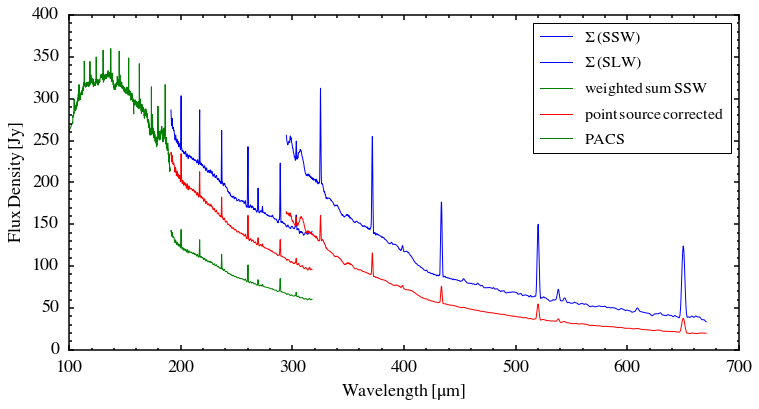

In [118]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(wl_ssw_sum, flux_ssw_sum, 'b-', label=r'$\rm{\Sigma\,(SSW)}$')
ax.plot(wl_slw_sum, flux_slw_sum, 'b-', label=r'$\rm{\Sigma\,(SLW)}$')

ax.plot(wl_ssw_wsum, flux_ssw_wsum, 'g-', label=r'$\rm{weighted\,sum\,SSW}$')

pot, = ax.plot(wl_slw_pot, flux_slw_pot, 'r-', label=r'$\rm{point\,source\,corrected}$')
ax.plot(wl_ssw_pot, flux_ssw_pot, 'r-')
# PACS
pacs, = ax.plot(wl_pacs, flux_pacs, 'g-', label=r'$\rm{PACS}$')

ax.legend(numpoints=1, loc='best', fontsize=16)
ax.set_xlim([100, 700])
ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)


### Return the weight of each spaxel

In [106]:
x0 = ra_dum
y0 = dec_dum
r0 = 18.
print (x0**2+y0**2)**0.5

31.4201625195


In [105]:

# map a 70" x 70" grid
w = 0.0
g2d = np.empty((701,701))
dA = (1/((len(g2d[:,0])-1)/2.)*35.)**2
for i in range(len(g2d[:,0])):
    for j in range(len(g2d[0,:])):
        x_dum = ((len(g2d[:,0])-1)/2. - i)/((len(g2d[:,0])-1)/2.)*35.
        y_dum = ((len(g2d[:,0])-1)/2. - j)/((len(g2d[:,0])-1)/2.)*35.
        g2d[i,j] = gauss2d(x_dum, y_dum)
        if (x_dum-x0)**2+(y_dum-y0)**2 <= r0**2:
            w += gauss2d(x_dum, y_dum)*dA
print w

0.0942283545913


In [82]:
r = np.arange(0,301,1)
r = (r - len(r)/2.)/(len(r)/2.) * 35.
print w

0.190649762548
